<a href="https://colab.research.google.com/github/davidib19/PrecipitationForecasting/blob/master/MonthOnly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import keras
from keras import layers
import os
import pickle
import numpy as np
import xarray
import matplotlib.pyplot as plt
import h5py
from sklearn.preprocessing import PowerTransformer, QuantileTransformer
strategy = tf.distribute.MirroredStrategy()


In [ ]:
X_train_b=np.load('/content/X_train_b.npy')
y_train=np.load('/content/y_train.npy')*1000


In [ ]:
X_train_b=np.cos(2*np.pi*(X_train_b[:,0]-1)/11)

In [ ]:
with strategy.scope():
  input = tf.keras.Input(shape=(1))
  x=input
  x = layers.Dense(128)(x)
  x = tf.keras.activations.hard_sigmoid(x)
  x = layers.Dense(24)(x)
  #x = tf.keras.activations.exponential(x)
  x = keras.Model(inputs=input, outputs=x)
  model = keras.Model(inputs=x.input, outputs=x.output)
  model.compile(loss='mean_squared_error',
              optimizer=keras.optimizers.Adam(),
               metrics=[tf.keras.metrics.RootMeanSquaredError()])
  history = model.fit(x=X_train_b,
                    epochs=70,
                    y=y_train, validation_split=0.2,batch_size=32)
  tf.keras.models.save_model(model, '/content/OnlyMonths.keras')

Epoch 1/70
85/85 [==============================] - 2s 9ms/step - loss: 0.3453 - root_mean_squared_error: 0.5876 - val_loss: 0.2837 - val_root_mean_squared_error: 0.5327
Epoch 2/70
85/85 [==============================] - 1s 7ms/step - loss: 0.2577 - root_mean_squared_error: 0.5077 - val_loss: 0.2786 - val_root_mean_squared_error: 0.5278
Epoch 3/70
85/85 [==============================] - 1s 7ms/step - loss: 0.2539 - root_mean_squared_error: 0.5039 - val_loss: 0.2772 - val_root_mean_squared_error: 0.5265
Epoch 4/70
85/85 [==============================] - 1s 10ms/step - loss: 0.2517 - root_mean_squared_error: 0.5017 - val_loss: 0.2746 - val_root_mean_squared_error: 0.5240
Epoch 5/70
85/85 [==============================] - 1s 11ms/step - loss: 0.2510 - root_mean_squared_error: 0.5010 - val_loss: 0.2739 - val_root_mean_squared_error: 0.5234
Epoch 6/70
85/85 [==============================] - 1s 10ms/step - loss: 0.2515 - root_mean_squared_error: 0.5015 - val_loss: 0.2732 - val_root_mean

In [ ]:
X_test_b=np.load('/content/X_test_b.npy')
X_test_b=np.cos(2*np.pi*(X_test_b[:,0]-1)/11)
y_test=np.load('/content/y_test.npy')*1000

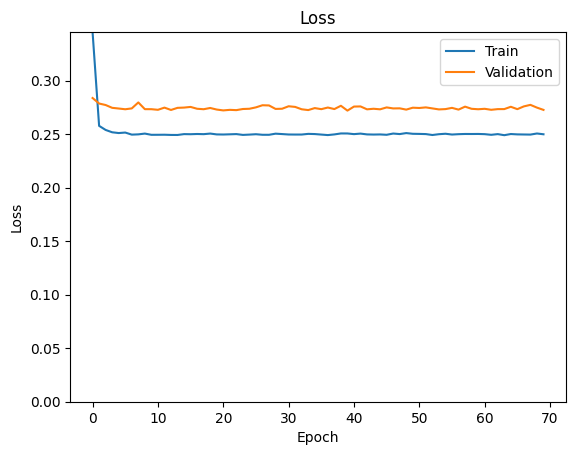

In [ ]:

def plot_history(history):
    """
    Plotting training and validation learning curves.

    Args:
      history: model history with all the metric measures
  """

    # Plot loss
    plt.title('Loss')
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.ylabel('Loss')


    # Determine upper bound of y-axis
    max_loss = max(history.history['loss'] + history.history['val_loss'])

    plt.ylim([0, max_loss])
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'])

    # Plot accuracy
    #ax2.set_title('Root')
    #ax2.plot(history.history['accuracy'], label='train')
    #ax2.plot(history.history['val_accuracy'], label='test')
    #ax2.set_ylabel('Accuracy')
    #ax2.set_ylim([0, max(history.history['accuracy']+history.history['val_accuracy'])])
    #ax2.set_xlabel('Epoch')
    #ax2.legend(['Train', 'Validation'])

    plt.show()


plot_history(history)


In [ ]:
y_predicted=model.predict(X_test_b)

23/23 [==============================] - 0s 4ms/step


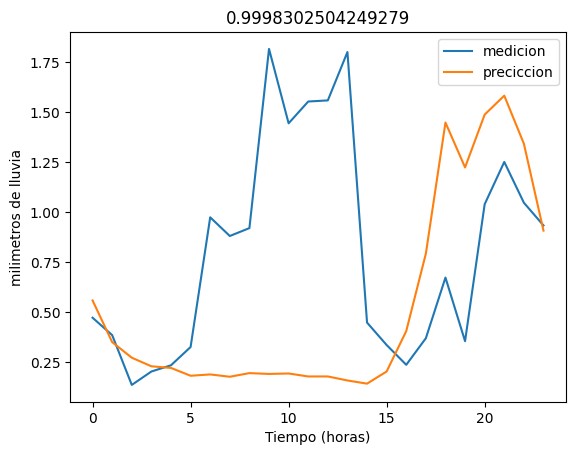

In [ ]:
plt.xlabel('Tiempo (horas)')
plt.ylabel('milimetros de lluvia')
plt.plot(y_test[350],label='medicion')
plt.plot(y_predicted[350],label='preciccion')
plt.title(X_test_b[350])
plt.legend()
plt.show()

In [ ]:
import math
MSE = np.square(np.subtract(y_test,y_predicted)).mean()

RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

0.5255183805541412
